In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df=pd.read_csv('Total_data.csv')

In [192]:
df.tail()

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,...,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
661,257,211029,3,2.7,1,20.83,46.5,1.56,20.5,53.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.7,3.5,19.107495,1
662,509,211037,1,3.3,1,17.83,40.9,1.49,22.0,51.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,4.6,18.422594,1
663,539,211040,1,2.9,1,18.00,42.0,1.54,22.0,51.0,...,0.0,0.0,1.0,0.0,0.0,1.0,NaN,5.5,17.709563,1
664,171,211042,2,2.9,1,23.00,55.0,1.45,27.0,52.5,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-0.5,26.159334,1
665,111,261003,2,3.0,1,25.75,40.0,1.49,21.5,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.5,3.5,18.017206,1


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  666 non-null    int64  
 1   id          666 non-null    int64  
 2   parity      666 non-null    int64  
 3   childwt     666 non-null    float64
 4   logit       666 non-null    int64  
 5   mage        666 non-null    float64
 6   mwt         666 non-null    float64
 7   mht         666 non-null    float64
 8   mdarm       666 non-null    float64
 9   head        666 non-null    float64
 10  relg        666 non-null    int64  
 11  habit       666 non-null    int64  
 12  occup       666 non-null    int64  
 13  educ        666 non-null    int64  
 14  workload    666 non-null    int64  
 15  f11         666 non-null    int64  
 16  f21         665 non-null    float64
 17  f31         665 non-null    float64
 18  f41         665 non-null    float64
 19  anemia      666 non-null    i

In [194]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,666.0,333.500000,192.401923,1.000000,167.250000,333.500000,499.750000,666.000000
id,666.0,154470.540541,50571.781097,101007.000000,106066.500000,108055.500000,205052.500000,261003.000000
parity,666.0,2.066066,1.143200,1.000000,1.000000,2.000000,3.000000,12.000000
childwt,666.0,2.703116,0.461223,0.500000,2.500000,2.700000,3.000000,4.800000
logit,666.0,0.756757,0.429363,0.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
db,599.0,0.699499,0.458859,0.000000,0.000000,1.000000,1.000000,1.000000
wg1,349.0,1.541691,2.081197,-9.500000,0.400000,1.500000,2.500000,11.500000
wg2,666.0,-0.479880,14.394533,-63.000000,2.000000,3.500000,5.000000,24.500000
BMI,550.0,19.171350,2.712150,11.764706,17.360268,18.681624,20.452415,31.009365


In [195]:
df[['childwt','logit','lda']]

,childwt,logit,lda
0,3.4,1,1
1,3.5,1,1
2,3.0,1,1
3,3.0,1,1
4,3.0,1,1
...,...,...,...
661,2.7,1,1
662,3.3,1,1
663,2.9,1,1
664,2.9,1,1


In [196]:
data=df[['childwt','logit','lda']]

In [197]:
data[data['childwt']<2.5]

,childwt,logit,lda
6,2.35,0,-1
10,2.20,0,-1
11,1.30,0,-1
17,2.40,0,-1
18,2.30,0,-1
...,...,...,...
649,2.30,0,-1
651,1.80,0,-1
652,1.50,0,-1
655,1.90,0,-1


In [198]:
data.corr()

,childwt,logit,lda
childwt,1.000000,0.700309,0.700309
logit,0.700309,1.000000,1.000000
lda,0.700309,1.000000,1.000000


In [199]:
df=df.drop(['Unnamed: 0','id','childwt','lda'],axis=1)

In [200]:
df.head()

,parity,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,...,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI
0,3,1,26.83,39.75,1.50,20.0,51.0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667
1,4,1,17.92,45.00,1.52,22.0,52.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147
2,1,1,35.00,43.00,1.50,20.0,53.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111
3,1,1,26.00,40.00,1.48,21.0,51.5,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505
4,1,1,25.00,56.00,1.51,28.0,49.5,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326


# Handalind Missing Value
### droping columns with more than 20% missing values and filling in rest of the columns with 0 as dataset is numerical

In [202]:
def missing_value(data):
    percen_nan=100*df.isnull().sum()/len(data)
    percen_nan=percen_nan[percen_nan>0].sort_values()
    return percen_nan

In [203]:
percen_nan=missing_value(df)

In [204]:
def barplot(index,value):
    plt.figure(figsize=(10,5),dpi=150)
    sns.barplot(x=index,y=value)
    plt.xticks(rotation=90);
    plt.title('Missing Values')

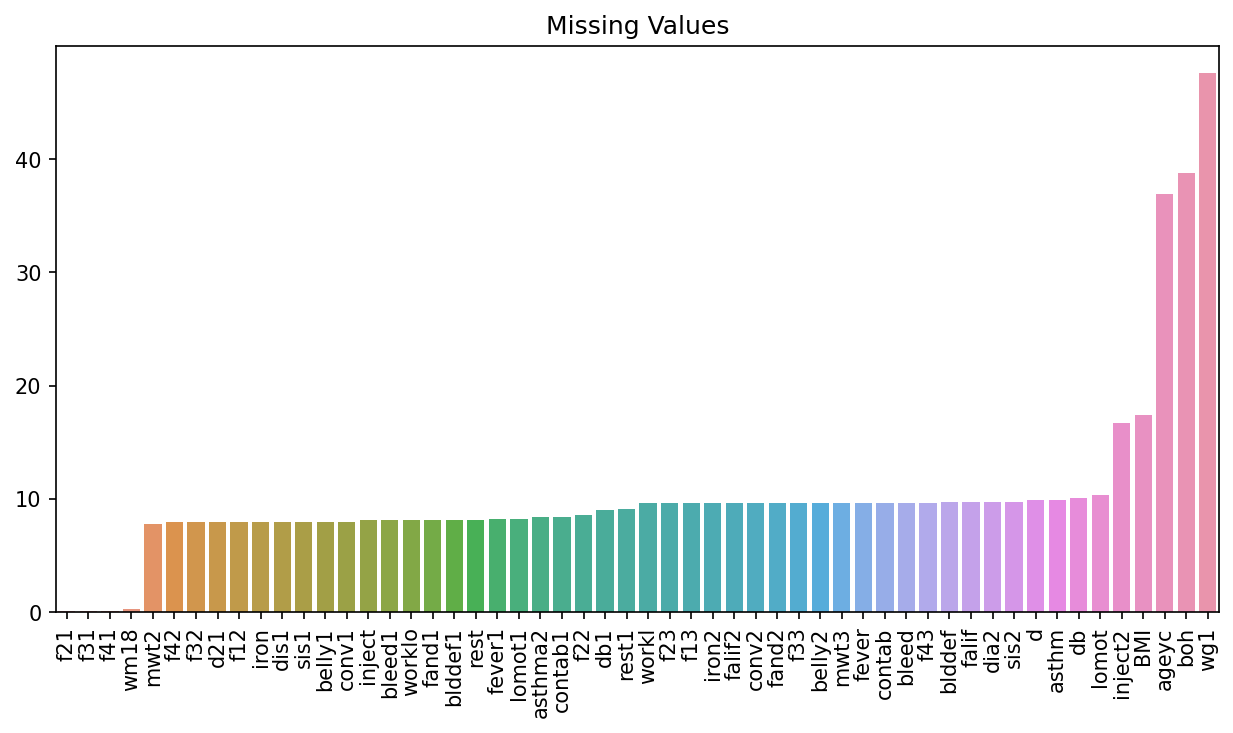

In [205]:
barplot(percen_nan.index,percen_nan)

In [206]:
df=df.drop(['ageyc','boh','wg1'],axis=1)

In [207]:
df.head()

,parity,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,...,d,bleed,blddef,asthm,fever,lomot,contab,db,wg2,BMI
0,3,1,26.83,39.75,1.50,20.0,51.0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.35,17.666667
1,4,1,17.92,45.00,1.52,22.0,52.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.00,19.477147
2,1,1,35.00,43.00,1.50,20.0,53.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.50,19.111111
3,1,1,26.00,40.00,1.48,21.0,51.5,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.00,18.261505
4,1,1,25.00,56.00,1.51,28.0,49.5,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.50,24.560326


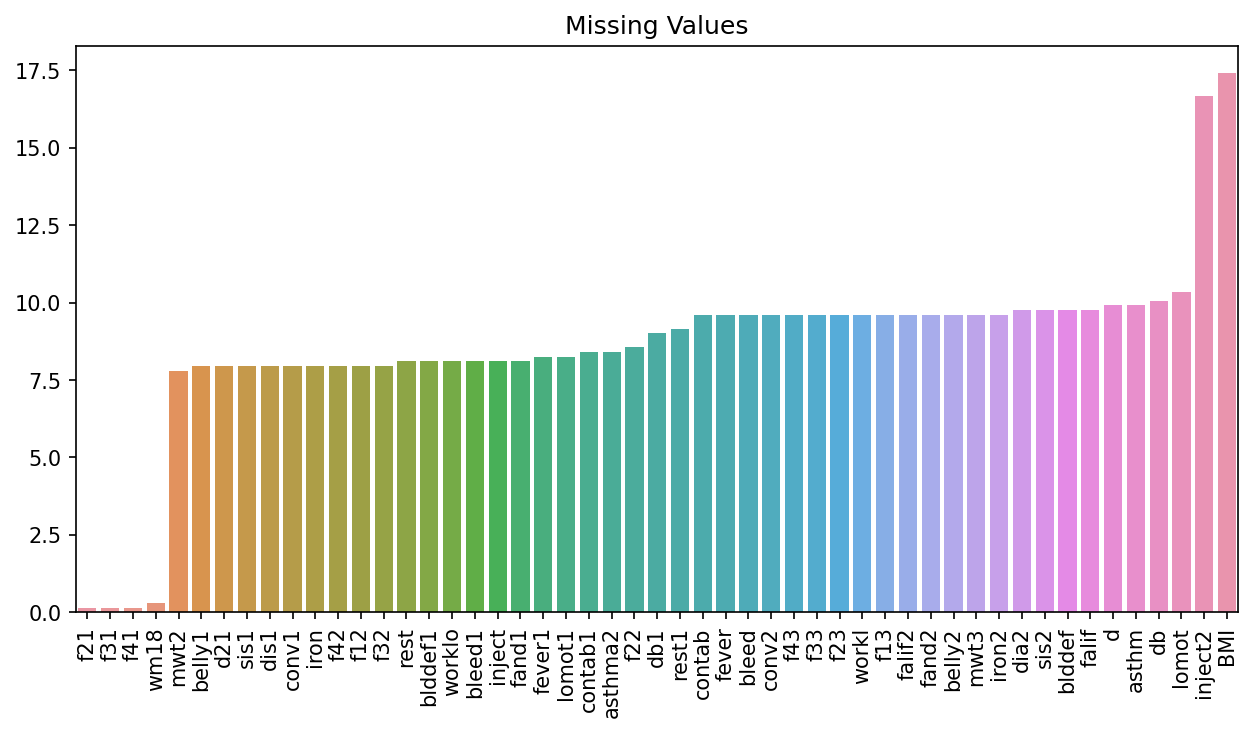

In [208]:
percen_nan=missing_value(df)
barplot(percen_nan.index,percen_nan)


In [209]:
df=df.fillna(0)

In [210]:
percen_nan=missing_value(df)

In [211]:
percen_nan

Series([], dtype: float64)

## Train Test Split
### Around 30% of the dataset is reserve for testing rest of of 70% is used to train different machine learning models X_train and X_test are scaled

#### Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.
#### https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832#:~:text=StandardScaler%20removes%20the%20mean%20and,standard%20deviation%20of%20each%20feature.

In [212]:
X=df.drop('logit',axis=1)

In [213]:
y=df['logit']

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scaled=StandardScaler()

In [218]:
X_train_scaled=scaled.fit_transform(X_train)

In [219]:
X_test_scaled=scaled.transform(X_test)

### Only Logistic Regression is applied in the dataset

In [220]:
from sklearn.linear_model import LogisticRegressionCV

In [221]:
log_model=LogisticRegressionCV()

In [222]:
log_model.fit(X_train_scaled,y_train)

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LogisticRegressionCV()

In [223]:
log_model.C_

array([2.7825594])

In [224]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [225]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

In [226]:
y_pred=log_model.predict(X_test_scaled)

In [227]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66        52
           1       0.87      0.93      0.90       148

    accuracy                           0.84       200
   macro avg       0.80      0.76      0.78       200
weighted avg       0.83      0.84      0.83       200



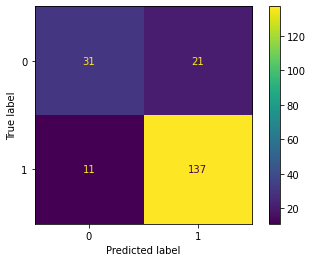

In [229]:
plot_confusion_matrix(log_model,X_test_scaled,y_test);

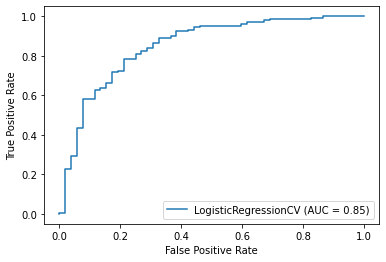

In [230]:
plot_roc_curve(log_model,X_test_scaled,y_test)

# Logistic Regression with GridSearchCV for hyperparameter tuning

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [232]:
penalty=['l1', 'l2', 'elasticnet']
C = np.logspace(0, 4, 10)
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

log1_model=LogisticRegression()

In [233]:
grid_model=GridSearchCV(log1_model,param_grid={'C':C,'penalty':penalty,'solver':solver})

In [234]:
grid_model.fit(X_train_scaled,y_train)

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Esti

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: 

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: 

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: 

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Est

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pleas

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    " %s." % (all_solvers, solver))
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newton-cholesky.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sa

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: 

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    sol

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pleas

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: 

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    sol

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pleas

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [235]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [236]:
y_pred=grid_model.predict(X_test_scaled)

In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        52
           1       0.88      0.93      0.91       148

    accuracy                           0.86       200
   macro avg       0.83      0.79      0.81       200
weighted avg       0.86      0.86      0.86       200



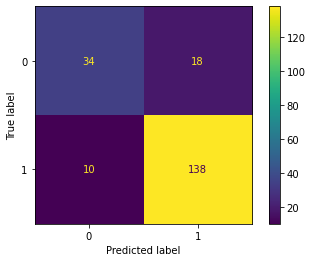

In [238]:
plot_confusion_matrix(grid_model,X_test_scaled,y_test)

# Random Forest Classifier with GridSearchCV 

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [241]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [242]:
rfc=RandomForestClassifier()

In [243]:
grid_rfc=GridSearchCV(rfc,param_grid)

In [244]:
grid_rfc.fit(X_train_scaled,y_train)

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\sit

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\sit

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\sit

E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
E:\Anaconda\Anaconda2\envs\Audio\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\Anaconda2\envs\Audio\lib\sit

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [245]:
grid_rfc.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 200,
 'oob_score': False}

In [246]:
rfc_pred=grid_rfc.predict(X_test_scaled)

In [247]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.52      0.67        52
           1       0.85      0.99      0.92       148

    accuracy                           0.87       200
   macro avg       0.91      0.76      0.80       200
weighted avg       0.88      0.87      0.86       200



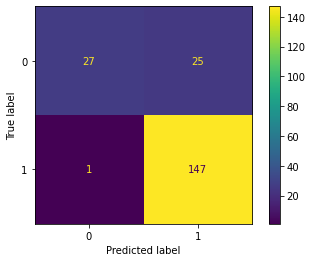

In [248]:
plot_confusion_matrix(grid_rfc,X_test_scaled,y_test)

# Training dataset on selected featured using feature_importances   
### https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [249]:
rfc_model=RandomForestClassifier(bootstrap=False,max_features=4, n_estimators=128, oob_score=False)

In [250]:
rfc_model.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=128)

In [251]:
rfc_model.feature_importances_

array([2.62876661e-02, 4.74438231e-02, 2.48255824e-02, 2.45082327e-02,
       2.19251239e-02, 2.96916596e-02, 5.43821992e-03, 2.66888907e-03,
       1.16606695e-02, 5.52379584e-03, 9.15017287e-04, 1.49615419e-02,
       1.70637963e-02, 6.93171896e-03, 1.52530645e-02, 6.67605170e-03,
       6.05156006e-04, 1.48991102e-02, 1.06128754e-02, 2.59315815e-02,
       3.58809700e-02, 3.06728876e-02, 1.75733920e-02, 2.08128642e-02,
       9.46910735e-03, 2.25633337e-02, 6.14581845e-03, 3.90520190e-03,
       1.37614108e-02, 2.17358087e-02, 7.88028118e-03, 1.37031028e-02,
       7.76341817e-03, 4.70950785e-03, 1.32578997e-03, 3.19472493e-03,
       9.99591222e-03, 1.67301293e-03, 5.50666853e-04, 2.23142152e-03,
       5.68001246e-04, 5.82113692e-03, 2.36614724e-02, 2.75474194e-02,
       3.12675966e-02, 1.88941830e-02, 3.03127537e-02, 9.79694813e-03,
       1.98654952e-02, 7.33186675e-03, 3.27570335e-03, 1.65707989e-02,
       1.86403125e-02, 7.80974603e-03, 1.42021049e-02, 8.95282974e-03,
      

In [252]:
feature_scores = pd.Series(rfc_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [253]:
feature_scores[feature_scores>0.02].index

Index(['BMI', 'mage', 'belly1', 'fand2', 'fand1', 'dia2', 'head', 'belly2',
       'parity', 'mwt2', 'mwt', 'mht', 'wg2', 'mwt3', 'falif', 'mdarm', 'f22',
       'dis1'],
      dtype='object')

In [254]:
x = df[['BMI', 'mage', 'belly1', 'head', 'fand1', 'fand2', 'belly2', 'mwt2',
       'mwt3', 'mdarm', 'mwt', 'dia2', 'parity', 'mht', 'wg2']]

In [255]:
x

,BMI,mage,belly1,head,fand1,fand2,belly2,mwt2,mwt3,mdarm,mwt,dia2,parity,mht,wg2
0,17.666667,26.83,71.5,51.0,17.0,25.4,80.5,43.0,46.1,20.0,39.75,80.0,3,1.50,6.35
1,19.477147,17.92,72.2,52.0,11.8,0.0,0.0,44.5,0.0,22.0,45.00,0.0,4,1.52,-45.00
2,19.111111,35.00,79.5,53.0,19.0,23.0,81.5,47.0,47.5,20.0,43.00,50.0,1,1.50,4.50
3,18.261505,26.00,71.5,51.5,12.0,20.0,78.0,44.0,47.0,21.0,40.00,52.0,1,1.48,7.00
4,24.560326,25.00,83.0,49.5,12.0,19.0,85.5,54.5,59.5,28.0,56.00,62.0,1,1.51,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,19.107495,20.83,74.8,53.0,16.8,22.5,86.5,47.2,50.0,20.5,46.50,60.0,3,1.56,3.50
662,18.422594,17.83,68.5,51.0,13.0,20.2,77.2,41.9,45.5,22.0,40.90,68.0,1,1.49,4.60
663,17.709563,18.00,74.0,51.0,12.5,19.2,77.5,46.0,47.5,22.0,42.00,2.0,1,1.54,5.50
664,26.159334,23.00,80.5,52.5,9.2,21.4,93.0,54.0,54.5,27.0,55.00,54.0,2,1.45,-0.50


In [256]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [257]:
x_train_scaled=scaled.fit_transform(x_train)

In [258]:
x_test_scaled = scaled.transform(x_test)

In [259]:
rfc_model1 = RandomForestClassifier(bootstrap=False,max_features=4, n_estimators=128, oob_score=False)

In [260]:
rfc_model1.fit(x_train_scaled,y_train)

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=128)

In [261]:
preds = rfc_model1.predict(x_test_scaled)

In [262]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        52
           1       0.90      0.93      0.91       148

    accuracy                           0.87       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.87      0.87      0.87       200



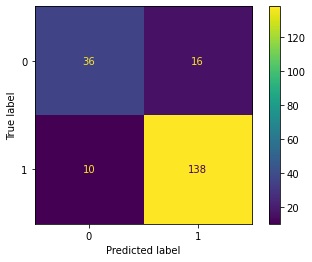

In [263]:
plot_confusion_matrix(rfc_model1,x_test_scaled,y_test)

## Applied logistics regression on same selected features

In [264]:
log_model1 = LogisticRegression(C=1.0, penalty='l1', solver='liblinear',max_iter=1000)

In [265]:
log_model1.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [266]:
preds1 = log_model1.predict(x_test_scaled)

In [267]:
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        52
           1       0.86      0.91      0.88       148

    accuracy                           0.82       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.82      0.82      0.82       200



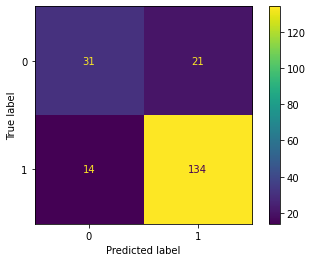

In [268]:
plot_confusion_matrix(log_model1,x_test_scaled,y_test)

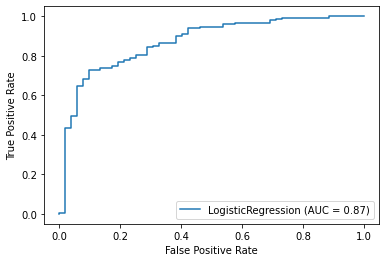

In [269]:
plot_roc_curve(log_model1,x_test_scaled,y_test)

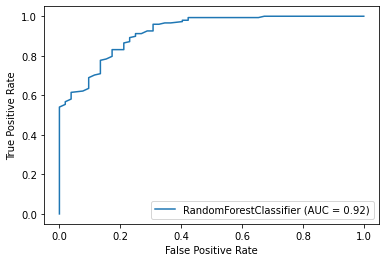

In [270]:
plot_roc_curve(rfc_model1,x_test_scaled,y_test)